In [2]:
install.packages('devtools', repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/annefou/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\annefou\AppData\Local\Temp\RtmpgbWfv4\downloaded_packages


In [3]:
install.packages('RSNNS', repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/annefou/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'RSNNS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\annefou\AppData\Local\Temp\RtmpgbWfv4\downloaded_packages


In [4]:
install.packages('xlsx', repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/annefou/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\annefou\AppData\Local\Temp\RtmpgbWfv4\downloaded_packages


In [6]:
# Loading
#library("readxl")    #read_excell()
library(nnet)
library(RSNNS)
library(splines)

library("xlsx")         #read.xlsx, read.xlsx2

Warning message:
"package 'RSNNS' was built under R version 3.4.4"Loading required package: Rcpp
Warning message:
"package 'Rcpp' was built under R version 3.4.2"Warning message:
"package 'xlsx' was built under R version 3.4.4"Loading required package: rJava
Warning message:
"package 'rJava' was built under R version 3.4.4"Error: package or namespace load failed for 'rJava':
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: fun(libname, pkgname)
  error: JAVA_HOME cannot be determined from the Registry


ERROR: Error: package 'rJava' could not be loaded


In [7]:
cat("\nBegin neural network using nnet \n\n")


Begin neural network using nnet 



In [10]:
cr630min <- read.csv("../data/cr6_30min.csv", header = T)
fix(cr630min)                         #open a spreadsheet view

In [11]:
rownames(cr630min) <- cr630min[,1]   #use 1st column as row names
fix(cr630min)

In [12]:
summary(cr630min)

                   X          Rl_downwell      Rl_upwell        AT_mbar     
 2016-09-29 15:30:00:    1   Min.   :144.9   Min.   :205.6   Min.   :831.7  
 2016-09-29 16:00:00:    1   1st Qu.:246.7   1st Qu.:291.1   1st Qu.:868.6  
 2016-09-29 16:30:00:    1   Median :286.2   Median :310.1   Median :874.9  
 2016-09-29 17:00:00:    1   Mean   :277.2   Mean   :311.4   Mean   :874.6  
 2016-09-29 17:30:00:    1   3rd Qu.:311.8   3rd Qu.:333.0   3rd Qu.:880.7  
 2016-09-29 18:00:00:    1   Max.   :357.9   Max.   :473.4   Max.   :903.2  
 (Other)            :18757   NA's   :7151    NA's   :7151    NA's   :8291   
     U_1477         Heatflux_1       Rs_downwell        Rs_upwell      
 Min.   : 9.322   Min.   :-24.453   Min.   :-10.536   Min.   : -8.365  
 1st Qu.:72.843   1st Qu.: -8.311   1st Qu.: -5.875   1st Qu.: -4.666  
 Median :81.664   Median : -2.396   Median : -1.068   Median : -1.660  
 Mean   :77.622   Mean   : -1.348   Mean   :106.756   Mean   : 43.039  
 3rd Qu.:86.540   3rd Qu

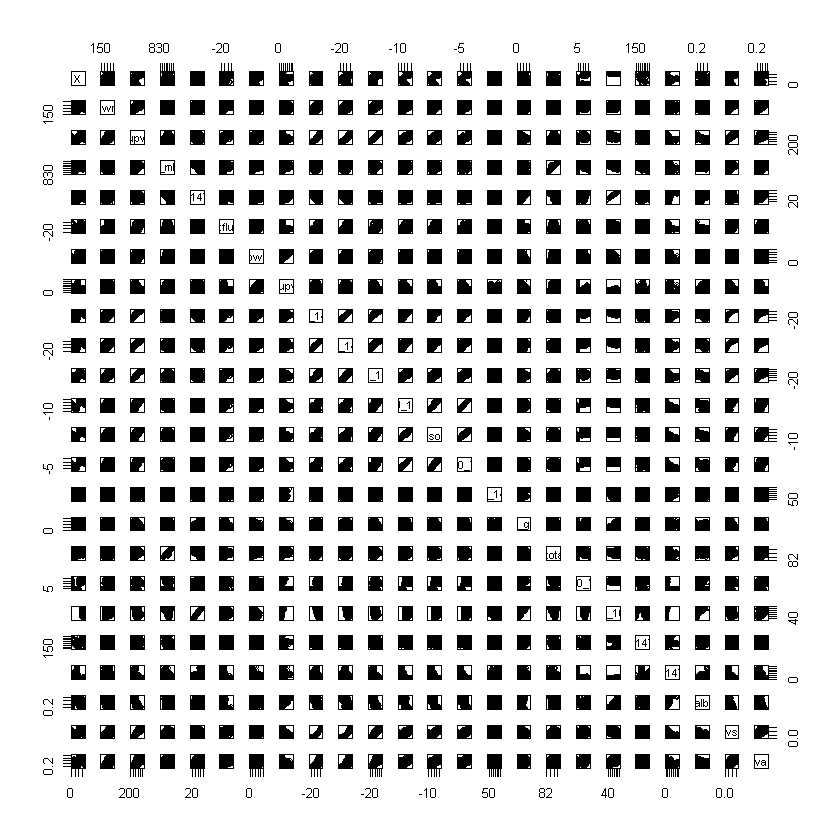

In [13]:
pairs(cr630min)     #create a scatterplot

In [14]:
apply(is.na(cr630min),2,sum)    #check on missing data

X  Rl_downwell    Rl_upwell      AT_mbar       U_1477   Heatflux_1 
           0         7151         7151         8291         6329         7392 
 Rs_downwell    Rs_upwell     T_a_1477     T_b_1477     TSS_1477    T_TJ_1477 
        7151         7151         7188         7184         6352         7598 
       Tsoil   CS650_Temp     D_g_1477 F_1_s_g_1477       Ptotal    CS650_VWC 
        7391         6617         8633         7418         8503         7946 
      RH_10m       R_1477       S_1477          alb           vs           va 
       16338         7594         7939        17345         7188         7193

In [15]:
head(cr630min)

X                   Rl_downwell Rl_upwell AT_mbar  U_1477  
2016-09-29 15:30:00 2016-09-29 15:30:00       NA          NA        NA       NA
2016-09-29 16:00:00 2016-09-29 16:00:00 322.4516    330.8186  844.5320 78.47244
2016-09-29 16:30:00 2016-09-29 16:30:00 322.2934    331.2879  844.8026 80.15661
2016-09-29 17:00:00 2016-09-29 17:00:00 323.0411    331.1737  845.0051 81.05869
2016-09-29 17:30:00 2016-09-29 17:30:00 312.7622    329.8675  845.7781 83.72098
2016-09-29 18:00:00 2016-09-29 18:00:00 319.0606    329.2991  846.4830 86.44736
                    Heatflux_1 Rs_downwell Rs_upwell  T_a_1477 T_b_1477 ...
2016-09-29 15:30:00        NA         NA           NA       NA       NA ...
2016-09-29 16:00:00 -4.461633  41.416418    6.1225031 3.959136 4.007113 ...
2016-09-29 16:30:00 -4.434028  10.257239    0.5710518 4.165595 4.147940 ...
2016-09-29 17:00:00 -4.388844   4.479927    0.7212713 4.145182 4.074448 ...
2016-09-29 17:30:00 -4.467692  -0.443555   -0.8048107 3.859197 3.752377 ...
2016-09-29 18:00:00 -4.596814  -2.864963   -2.0178247 3.570906 3.508948 ...
                    D_g_1477 F_1_s_g_1477 Ptotal   CS650_VWC RH_10m R_1477  
2016-09-29 15:30:00       NA       NA           NA       NA  NA           NA
2016-09-29 16:00:00 246.8313 11.17549     83.49483 27.42293  NA           NA
2016-09-29 16:30:00 256.4857 13.47467     83.49865 27.35859  NA     313.8605
2016-09-29 17:00:00 262.1343 15.98824     83.49462 27.35709  NA     314.3659
2016-09-29 17:30:00 275.5138 12.74020     83.61139 27.29687  NA     314.7600
2016-09-29 18:00:00 285.7590 12.54331     83.68910 27.18374  NA     314.9422
                    S_1477    alb vs        va       
2016-09-29 15:30:00        NA NA         NA        NA
2016-09-29 16:00:00        NA NA  0.8161881 0.6401858
2016-09-29 16:30:00 0.7032956 NA  0.8282120 0.6638043
2016-09-29 17:00:00 0.9346250 NA  0.8269854 0.6703142
2016-09-29 17:30:00 0.7187742 NA  0.8101618 0.6782665
2016-09-29 18:00:00 0.5344306 NA  0.7935205 0.6859679

In [16]:
dim(cr630min)

[1] 18763    24

In [17]:
cr630min <- na.omit(cr630min)    #remove rows containing missing data
head(cr630min)

X                   Rl_downwell Rl_upwell AT_mbar  U_1477  
2017-08-24 14:00:00 2017-08-24 14:00:00 310.2155    394.6672  872.0491 49.15834
2017-08-27 09:30:00 2017-08-27 09:30:00 263.7819    407.7029  877.1429 52.62859
2017-10-02 09:00:00 2017-10-02 09:00:00 290.8943    342.2560  856.1553 72.13806
2017-10-02 10:30:00 2017-10-02 10:30:00 288.1044    340.4700  855.9753 68.99750
2017-10-02 11:00:00 2017-10-02 11:00:00 263.3633    344.9181  855.5666 70.06338
2017-10-02 11:30:00 2017-10-02 11:30:00 249.4025    352.4809  855.2561 65.49161
                    Heatflux_1 Rs_downwell Rs_upwell T_a_1477  T_b_1477  ...
2017-08-24 14:00:00 29.200446  289.6511     49.07945 10.780651 10.380944 ...
2017-08-27 09:30:00  5.189010  574.0070    111.45923 10.878461 10.320568 ...
2017-10-02 09:00:00 -0.940726  286.1085     44.53938  4.743623  4.589827 ...
2017-10-02 10:30:00  1.304082  178.2472     24.24765  4.964501  4.875638 ...
2017-10-02 11:00:00  2.107518  326.0869     52.60515  5.294806  5.121724 ...
2017-10-02 11:30:00  3.191856  465.1295     80.39390  5.995009  5.638797 ...
                    D_g_1477 F_1_s_g_1477 Ptotal   CS650_VWC RH_10m   R_1477  
2017-08-24 14:00:00 122.8866 2.198738     86.08553 16.73105  55.41310 138.5005
2017-08-27 09:30:00 122.7752 2.012493     86.59538 16.00308  59.18457 138.1004
2017-10-02 09:00:00 203.1019 4.298896     84.54955 25.56996  74.98043 342.9964
2017-10-02 10:30:00 190.6111 4.428058     84.51881 25.09646  71.91957 342.9546
2017-10-02 11:00:00 166.8204 6.011634     84.48208 24.93737  73.80075 342.9621
2017-10-02 11:30:00 157.1755 5.913308     84.43793 24.66904  69.60595 342.9806
                    S_1477    alb       vs        va       
2017-08-24 14:00:00 0.8809917 0.1691023 1.3146031 0.6461248
2017-08-27 09:30:00 0.9235536 0.1940389 1.3234863 0.6962782
2017-10-02 09:00:00 0.8678611 0.1508878 0.8633440 0.6227906
2017-10-02 10:30:00 0.8759167 0.1314902 0.8770089 0.6047563
2017-10-02 11:00:00 0.8806528 0.1559206 0.8978402 0.6290159
2017-10-02 11:30:00 0.9100139 0.1728426 0.9434824 0.6178776

In [18]:
dim(cr630min)
n <- nrow(cr630min)
n
cr630min$X <- as.factor(cr630min$X)

[1] 145  24

[1] 145

In [21]:
pairs(cr630min- cr630min$X)     #create a scatterplot

Warning message in pairs(cr630min - cr630min$X):
"Incompatible methods ("Ops.data.frame", "Ops.factor") for "-""

ERROR: Error in cr630min - cr630min$X: non-numeric argument to binary operator


In [22]:
train <- sample(1:n,as.integer(0.5*n),replace=FALSE)
test <- c(1:n)[-train]
fit20 <- multinom(Heatflux_1~.-X,data=cr630min[train,c(1+1:10,n)],maxit=1000)
summary(fit20)
pred20 <- predict(fit20,cr630min[test,])
#Confusion matrix
table(cr630min$Heatflux_1[test],pred20)
#Error rate
err.20 <- 1-sum(diag(table(cr630min$Heatflux_1[test],pred20)))/length(test)
show(err.20)

ERROR: Error in `[.data.frame`(cr630min, train, c(1 + 1:10, n)): undefined columns selected


In [23]:


cr630min.nnet <- nnet(Heatflux_1~.-X,data=cr630min[1:N.tr,],size=m,decay=0.1,
  MaxNWts=10000,maxit=300)
pred <- predict(cr630min.nnet,cr630min[N.tr+1:N.te,],type="class")
table(zip.test$cl,pred)
err.nnet<- mean(cr630min.test$cl!=pred)

ERROR: Error in `[.data.frame`(cr630min, 1:N.tr, ): object 'N.tr' not found


In [24]:
lm.fit<-lm(Heatflux_1~. - X,data=cr630min)
summary(lm.fit)


Call:
lm(formula = Heatflux_1 ~ . - X, data = cr630min)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0309  -0.8224  -0.1086   0.8936   9.1741 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.187e+02  8.456e+01  -3.769 0.000254 ***
Rl_downwell   3.446e-02  1.699e-02   2.028 0.044727 *  
Rl_upwell     2.514e-02  1.667e-01   0.151 0.880407    
AT_mbar      -6.376e-01  2.994e+00  -0.213 0.831713    
U_1477       -9.424e-01  2.829e-01  -3.331 0.001145 ** 
Rs_downwell  -1.712e-02  8.610e-03  -1.988 0.049018 *  
Rs_upwell     3.483e-02  1.731e-02   2.012 0.046397 *  
T_a_1477     -2.539e+00  2.620e+00  -0.969 0.334366    
T_b_1477     -2.500e+00  2.321e+00  -1.077 0.283581    
TSS_1477      2.729e-01  5.462e-01   0.500 0.618236    
T_TJ_1477     1.762e+01  3.624e+00   4.861 3.52e-06 ***
Tsoil         8.804e-01  5.652e-01   1.558 0.121875    
CS650_Temp   -1.586e+01  3.683e+00  -4.307 3.36e-05 ***
D_g_1477     -8.357e-03  5.208e-03  -1.6

In [25]:
# xls files
trainingdata <- read.xlsx("fictive_training_Enet.xlsx", sheetIndex = 2, header=TRUE,  colClasses="character")
# xlsx files
#my_data <- read_excel("my_file.xlsx")
head(trainingdata)
nrow(trainingdata)

ERROR: Error in read.xlsx("fictive_training_Enet.xlsx", sheetIndex = 2, header = TRUE, : could not find function "read.xlsx"


In [26]:
timeseries <- read.xlsx("fictive_met_timeseries.xlsx", sheetIndex = 1, header=TRUE,  colClasses="character")
#sheetIndex: the index of the sheet to be read
#header: a logical value. If TRUE, the first row is used as column names.
#colClasses : a character vector that represents the class of each column
head(timeseries)
nrow(timeseries)

ERROR: Error in read.xlsx("fictive_met_timeseries.xlsx", sheetIndex = 1, header = TRUE, : could not find function "read.xlsx"


In [ ]:
map <- read.xlsx("fictive_map.xlsx", sheetIndex = 1, header=TRUE,  colClasses="character")
head(map)
nrow(map)

In [1]:
%%bash
ls

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [48]:
metdataANN <- read.csv("met_data_ANN.csv", header = T)
head(metdataANN)

Dato                LW_down  SW_down  T_air    WS       RH      
1 2017-08-17 12:30:00 342.8358 46.68628 7.490842 1.047974 86.11994
2 2017-08-17 13:00:00 343.2188 24.08526 7.545585 1.051992 85.89298
3 2017-08-17 13:30:00 344.0644 15.14655 7.603300 1.056216 86.24138
4 2017-08-17 14:00:00 344.8816 11.12840 7.524044 1.050390 88.00522
5 2017-08-17 14:30:00 343.3200 15.10281 7.567231 1.053560 86.51920
6 2017-08-17 15:00:00 343.2455 16.89337 7.670029 1.061150 86.12920

In [27]:
metdataANN$Dato <- as.factor(metdataANN$Dato)
pairs(metdataANN)
apply(is.na(metdataANN),2,sum)    #check on missing data

ERROR: Error in is.factor(x): object 'metdataANN' not found


In [92]:
n <- nrow(metdataANN)
train <- sample(1:n,as.integer(0.5*n),replace=FALSE)
test <- c(1:n)[-train]

fit3 <- multinom(T_air~. ,data=metdataANN[train,c(1+2:3,ncol(metdataANN))],maxit=1000)
summary(fit3)
pred3 <- predict(fit3,metdataANN[test,])
#Confusion matrix
table(metdataANN$T_air[test],pred3)
#Error rate
err.3 <- 1-sum(diag(table(metdataANN$T_air[test],pred3)))/length(test)
show(err.3)

fit4 <- multinom(T_air~.,data=metdataANN[train,c(1+1:4,ncol(metdataANN))],maxit=1000,MaxNWts=10000)
pred4 <- predict(fit4,metdataANN[test,])
table(metdataANN$T_air[test],pred4)
err.4 <- 1-sum(diag(table(metdataANN$T_air[test],pred4)))/length(test)
show(err.4)

# weights:  960 (717 variable)
initial  value 1315.353342 
iter  10 value 1208.638386
iter  20 value 1173.810950
iter  30 value 1165.716137
iter  40 value 1158.638834
iter  50 value 1154.054624
iter  60 value 1152.764624
iter  70 value 1151.602979
iter  80 value 1150.927854
iter  90 value 1150.331777
iter 100 value 1149.819735
iter 110 value 1149.045103
iter 120 value 1147.457825
iter 130 value 1145.600099
iter 140 value 1143.384953
iter 150 value 1139.086525
iter 160 value 1127.752195
iter 170 value 1119.906766
iter 180 value 1114.369344
iter 190 value 1106.433501
iter 200 value 1097.224820
iter 210 value 1091.539222
iter 220 value 1088.287700
iter 230 value 1082.958531
iter 240 value 1078.189193
iter 250 value 1068.635742
iter 260 value 1066.694110
iter 270 value 1054.550410
iter 280 value 1048.459697
iter 290 value 1044.501456
iter 300 value 1024.871383
iter 310 value 1020.262046
iter 320 value 1010.641310
iter 330 value 1004.135812
iter 340 value 989.225466
iter 350 value 959.04728

Warning message in sqrt(diag(vc)):
“NaNs produced”

Call:
multinom(formula = T_air ~ ., data = metdataANN[train, c(1 + 
    2:3, ncol(metdataANN))], maxit = 1000)

Coefficients:
                  (Intercept)      SW_down            RH
1.74560163169692 -1441552.945  -4561.89852   17356.40895
1.86485904621989  -941559.520   3114.83468    8405.15015
1.9551094880393  -1647684.434 -15212.25198   18850.39434
2.03027100118635 -1919991.774  -9532.58307   22145.69671
2.05210851631676 -1135991.130  -4057.94941   13959.68387
2.07747015041613 -1898076.307  -4585.52363   22213.76156
2.11452859568298 -1414221.323 -17788.95760   16129.30792
2.16497475489379  -555221.558  -4549.76158    7459.15022
2.21438924713802  -896402.187  -9469.41002   11116.78622
2.44106536606472 -1051078.203 -15300.27471   12349.66991
2.44987969567012  -712624.374 -19496.59108    8179.84115
3.06524096721549 -1851273.106   3961.80571   17581.38365
3.23474083554118    75039.927 -13405.83427    -359.57431
3.33495192911623   -94781.559 -10662.24184    1890.72856
3.37195351601763   

                  pred3
                   1.64598462973352 1.74560163169692 1.86485904621989
  1.60161439704991                0                0                0
  2.08977832672325                0                0                0
  2.21945769049968                0                0                0
  2.81437473525255                0                0                0
  2.89215130511812                0                0                0
  2.90954761955281                0                0                0
  2.92600495080227                0                0                0
  3.00359669092143                0                0                0
  3.12532526735931                0                0                0
  3.12793895783592                0                0                0
  3.29084075687779                0                0                0
  3.58541726301012                0                0                0
  3.78272528439632                0                0              

[1] 0.9875
# weights:  1440 (1195 variable)
initial  value 1315.353342 
iter  10 value 1163.006828
iter  20 value 1148.779020
iter  30 value 1130.023391
iter  40 value 1095.648211
iter  50 value 1071.316475
iter  60 value 1044.221762
iter  70 value 1028.319447
iter  80 value 1021.237919
iter  90 value 1011.075924
iter 100 value 1003.213272
iter 110 value 998.350976
iter 120 value 994.521068
iter 130 value 990.981026
iter 140 value 988.931096
iter 150 value 986.978598
iter 160 value 983.704752
iter 170 value 982.635368
iter 180 value 980.927676
iter 190 value 979.626626
iter 200 value 977.886276
iter 210 value 975.818959
iter 220 value 973.893952
iter 230 value 971.603219
iter 240 value 968.799592
iter 250 value 964.980460
iter 260 value 961.084478
iter 270 value 955.297751
iter 280 value 950.767121
iter 290 value 941.466065
iter 300 value 939.655586
iter 310 value 934.386007
iter 320 value 932.939558
iter 330 value 929.012904
iter 340 value 926.891474
iter 350 value 920.150816
iter 360

                  pred4
                   1.64598462973352 1.74560163169692 1.86485904621989
  1.60161439704991                0                0                0
  2.08977832672325                0                0                0
  2.21945769049968                0                0                0
  2.81437473525255                0                0                0
  2.89215130511812                0                0                0
  2.90954761955281                0                0                0
  2.92600495080227                0                0                0
  3.00359669092143                0                0                0
  3.12532526735931                0                0                0
  3.12793895783592                0                0                0
  3.29084075687779                0                0                0
  3.58541726301012                0                0                0
  3.78272528439632                0                0              

[1] 0.9625


In [97]:
fit.ns3 <- multinom(T_air~ns(LW_down,4)+ns(SW_down,4)+ns(WS,4)+ns(RH,4),data=metdataANN,maxit=5000,MaxNWts=10000)
pred.ns3 <- predict(fit.ns3,metdataANN[-train,])
table(metdataANN$T_air[-train],pred.ns3)
err.ns3 <- 1-sum(diag(table(metdataANN$T_air[test],pred.ns3)))/length(test)
show(err.ns3)

metdataANN.prcomp <- prcomp(metdataANN[,c(2:3,5:ncol(metdataANN))],retx=TRUE)
d <- data.frame(T_air=metdataANN$T_air,metdataANN=metdataANN.prcomp$metdataANN[,1:2])
fit.pca <- multinom(T_air~.,data=d[train,],maxit=1000)
pred.pca <- predict(fit.pca,d[-train,])
table(metdataANN$T_air[-train],pred.pca)
err.pca <- 1-sum(diag(table(metdataANN$T_air[test],pred.pca)))/length(test)
show(err.pca)



# weights:  8640 (8143 variable)
initial  value 2963.417330 
iter  10 value 317.551587
iter  20 value 201.502111
iter  30 value 180.232588
iter  40 value 155.633169
iter  50 value 133.951468
iter  60 value 110.420242
iter  70 value 91.421540
iter  80 value 76.853864
iter  90 value 63.798387
iter 100 value 51.306404
iter 110 value 42.891181
iter 120 value 33.269571
iter 130 value 25.262850
iter 140 value 16.827355
iter 150 value 5.626665
iter 160 value 0.150020
iter 170 value 0.016992
iter 180 value 0.000588
iter 190 value 0.000140
final  value 0.000091 
converged


                  pred.ns3
                   1.60161439704991 1.64598462973352 1.74560163169692
  1.60161439704991                1                0                0
  2.08977832672325                0                0                0
  2.21945769049968                0                0                0
  2.81437473525255                0                0                0
  2.89215130511812                0                0                0
  2.90954761955281                0                0                0
  2.92600495080227                0                0                0
  3.00359669092143                0                0                0
  3.12532526735931                0                0                0
  3.12793895783592                0                0                0
  3.29084075687779                0                0                0
  3.58541726301012                0                0                0
  3.78272528439632                0                0           

[1] 0.9958333


ERROR: Error in data.frame(T_air = metdataANN$T_air, metdataANN = metdataANN.prcomp$metdataANN[, : arguments imply differing number of rows: 480, 0


In [54]:
fit.pca3.ns <- multinom(T_air~ns(metdataANN.PC1,4)+ns(metdataANN.PC2,4)+ns(metdataANN.PC3,4),data=d,maxit=1000)
pred.pca20.ns <- predict(fit.pca3.ns,d[-train,])
table(x$g[-train],pred.pca20.ns)
err.pca20.ns <- 1-sum(diag(table(x$g[test],pred.pca20.ns)))/length(test)
show(err.pca20.ns)

[1] 480   6

In [63]:
? multinom

In [105]:
? scale

In [104]:
scale(metdataANN[,-1])

LW_down    SW_down    T_air        WS           RH         
1   1.307498   -0.5697018  0.064809779 -0.005142016 0.7279306  
2   1.318216   -0.6662454  0.088928753  0.019082855 0.7105313  
3   1.341879   -0.7044285  0.114356663  0.044556525 0.7372403  
4   1.364747   -0.7215926  0.079438283  0.009425617 0.8724604  
5   1.321049   -0.7046153  0.098465345  0.028537410 0.7585389  
6   1.318965   -0.6969667  0.143756017  0.074308918 0.7286404  
7   1.345829   -0.7253942  0.146500935  0.077050756 0.7186315  
8   1.325148   -0.6734792 -0.003328864 -0.073031625 0.7816726  
9   1.289272   -0.6630716 -0.012268046 -0.082011206 0.6679833  
10  1.257400   -0.6694445 -0.112374046 -0.180466069 0.6991236  
11  1.208074   -0.6566945 -0.171055863 -0.237495898 0.6376711  
12  1.196059   -0.7090836 -0.306089366 -0.367067636 0.6654404  
13  1.172841   -0.7484435 -0.509366744 -0.557452550 0.8239891  
14  1.147562   -0.7659693 -0.591602820 -0.633118492 0.7862954  
15  1.183107   -0.7818863 -0.608457557 -0.648513412 0.9345284  
16  1.185921   -0.7854940 -0.676114876 -0.709760714 1.0739469  
17  1.196383   -0.7886270 -0.701017372 -0.732276487 1.2023767  
18  1.199607   -0.7878188 -0.724617662 -0.753452168 1.2016760  
19  1.252519   -0.7862886 -0.550048891 -0.594964513 1.1046574  
20  1.271819   -0.7873252 -0.544768318 -0.590203949 1.2321581  
21  1.308604   -0.7887601 -0.480854409 -0.531177439 1.3035745  
22  1.310505   -0.7886158 -0.467216115 -0.518590709 1.3820565  
23  1.306826   -0.7874878 -0.302447384 -0.363326211 1.2982248  
24  1.333743   -0.7873299 -0.195354885 -0.261034727 1.1791060  
25  1.379973   -0.7888355 -0.233170678 -0.297199938 1.2640590  
26  1.403933   -0.7898072 -0.229060295 -0.293425260 1.3323225  
27  1.444278   -0.7914478 -0.191722038 -0.257524639 1.3211869  
28  1.510133   -0.7909854 -0.281471093 -0.343722422 1.4881074  
29  1.522292   -0.7910202 -0.256999029 -0.320328846 1.5110798  
30  1.488666   -0.7931928 -0.227739912 -0.292280395 1.5442044  
⋮   ⋮          ⋮          ⋮            ⋮            ⋮          
451 -1.1805285 -0.8050729 -1.0347464   -1.0250242   -0.78228147
452 -1.1792737 -0.8045444 -0.9885983   -0.9854222   -0.72849696
453 -1.1532970 -0.8050933 -1.1336278   -1.1091170   -0.47162395
454 -1.1455868 -0.8045550 -0.9906091   -0.9869427   -0.17412466
455 -1.1249727 -0.8049794 -1.1999772   -1.1648952   -0.06121494
456 -0.9293617 -0.8048299 -1.5386214   -1.4415014    0.25089203
457 -0.8741042 -0.8008568 -1.6272615   -1.5120824    0.43630348
458 -0.9895577 -0.8015078 -1.7661934   -1.6201784    0.67568374
459 -1.1765801 -0.8031451 -1.9463674   -1.7571388    0.80434297
460 -1.3030577 -0.8026678 -2.1600223   -1.9155885    1.09252833
461 -1.3343849 -0.8032224 -2.3038880   -2.0191613    1.21504923
462 -1.3546764 -0.8020805 -2.3741249   -2.0690445    1.34203453
463 -1.3682967 -0.8027654 -2.3147924   -2.0270328    1.21053310
464 -1.3974422 -0.8004421 -2.3410102   -2.0455234    1.43746979
465 -1.4064132 -0.7729824 -2.5298679   -2.1776682    1.44418813
466 -1.4092728 -0.7176007 -2.3202152   -2.0297880    1.43633382
467 -1.4416362 -0.5711415 -2.5103192   -2.1639190    1.39610582
468 -1.4170931 -0.1620062 -1.6656756   -1.5385026    1.13723769
469 -1.3582929  0.1251419 -0.9264048   -0.9292070    0.56458607
470 -1.2899168  0.4101335 -0.1843711   -0.2490796   -0.10055802
471 -1.2063822  0.7046233  0.3121094    0.2474091   -0.51077177
472 -1.1245716  1.0059826  0.6824866    0.6413070   -0.51008488
473 -1.0394066  1.2543329  1.0245455    1.0233892   -0.85103094
474 -0.9880888  1.4824865  1.3005097    1.3448759   -1.03168865
475 -0.9046291  1.6828285  1.5573281    1.6561950   -1.33699600
476 -0.8621714  1.8630410  1.7812871    1.9350339   -1.75032471
477 -0.8171910  1.9901265  1.9873626    2.2005177   -1.68493283
478 -0.7453755  2.1081443  1.9999242    2.2168018   -1.71131781
479 -0.6103832  2.2069954  2.2366387    2.5318953   -1.80469103
480 -0.4973079  2.3211471  2.2762921    2.5851860   -1.93584652

In [107]:
test
metdataANN.test <- metdataANN[test,]
metdataANN.test[,-1]

[1]   4   5   6   8  10  11  13  16  17  19  20  23  26  27  29  32  33  34
 [19]  36  37  38  39  40  41  42  43  44  45  46  47  50  52  54  57  61  62
 [37]  64  65  66  68  72  73  74  75  76  78  81  84  86  89  91  92  93  94
 [55]  95  96  97 100 101 103 107 108 109 110 111 115 118 120 121 123 124 125
 [73] 126 128 130 131 132 133 134 135 138 139 141 143 144 147 148 151 153 154
 [91] 155 157 159 160 161 162 163 165 167 169 171 173 174 175 179 180 182 184
[109] 185 186 189 190 193 197 199 201 203 204 207 210 214 215 218 219 220 222
[127] 227 228 230 233 235 241 242 246 249 250 252 254 256 261 266 267 269 272
[145] 273 274 276 277 278 282 284 285 287 292 293 297 298 299 300 301 302 303
[163] 306 307 308 310 314 315 316 317 320 322 325 330 334 336 338 339 341 344
[181] 345 347 351 353 357 358 360 364 370 374 375 376 378 379 382 384 386 387
[199] 389 391 392 394 398 399 400 401 403 404 405 407 409 410 411 416 417 420
[217] 425 429 430 431 432 437 438 441 442 444 446 448 449 450 453 454 455 459
[235] 463 465 474 476 477 478

LW_down  SW_down     T_air     WS        RH      
4   344.8816  11.1284006  7.524044 1.0503902 88.00522
5   343.3200  15.1028072  7.567231 1.0535597 86.51920
6   343.2455  16.8933717  7.670029 1.0611503 86.12920
8   343.4665  22.3918236  7.336185 1.0367157 86.82097
10  341.0454  23.3363570  7.088682 1.0188991 85.74418
11  339.2827  26.3211408  6.955489 1.0094414 84.94258
13  338.0236   4.8425620  6.187614 0.9563806 87.37295
16  338.4910  -3.8310133  5.809140 0.9311222 90.63346
17  338.8649  -4.5644632  5.752618 0.9273882 92.30873
19  340.8710  -4.0170253  6.095276 0.9501597 91.03405
20  341.5607  -4.2597009  6.107262 0.9509492 92.69720
23  342.8117  -4.2977656  6.657266 0.9885740 93.55899
26  346.2820  -4.8407371  6.823835 1.0001662 94.00377
27  347.7238  -5.2248145  6.908583 1.0061199 93.85851
29  350.5118  -5.1247121  6.760421 0.9957046 96.33552
32  348.7260  -4.8823977  6.851211 1.0020688 96.45672
33  347.3485  -0.2089469  6.848313 1.0018650 96.89752
34  346.8355   4.8942528  6.849000 1.0019132 97.14821
36  348.7716  29.1388467  6.934232 1.0079267 97.48775
37  351.7766  52.8888336  7.072076 1.0177114 97.51840
38  341.9305 184.4221462  7.536034 1.0513859 96.71022
39  334.8314 190.5120567  8.026576 1.0878182 91.72843
40  341.4331 209.3727348  8.315910 1.1098861 90.67248
41  338.8562 232.2386218  8.567854 1.1294844 88.60073
42  313.3777 371.2830177  9.291080 1.1874088 84.20570
43  286.8562 588.5887154 10.254929 1.2684953 74.99133
44  308.4933 572.4137495 10.818005 1.3180589 67.16653
45  308.6639 490.4221957 10.874518 1.3230717 66.09212
46  321.5613 391.2907557 11.084178 1.3420788 66.40511
47  317.9745 557.6653018 11.593786 1.3894664 60.39026
⋮   ⋮        ⋮           ⋮         ⋮         ⋮       
409 249.4939  -9.4867335  5.328449 0.9000510 83.35304
410 246.1243  -9.1108671  4.297338 0.8361865 83.48352
411 246.6560  -8.8601200  4.056245 0.8217339 81.66957
416 242.1921  -7.8925859  2.892151 0.7555545 85.19692
417 240.1419  -0.7776388  2.219458 0.7194792 90.28190
420 242.2725 149.5818937  3.804519 0.8079547 81.90837
425 253.0751 481.7719285  8.162655 1.0981861 68.78113
429 258.6176 660.3537734  9.485921 1.2033473 64.13596
430 259.7684 679.5935121  9.957891 1.2428554 61.74581
431 263.3660 621.3880399 10.230420 1.2662346 62.31756
432 263.5979 689.6227796 10.499415 1.2897383 58.41649
437 272.5297 547.6103619 11.328911 1.3644010 58.77898
438 271.1708 487.2185463 10.998035 1.3341207 61.16911
441 268.1452 278.2986835 10.498573 1.2895740 64.46433
442 269.3986 216.4715621 10.246219 1.2675468 64.56846
444 285.5085  87.5943243  9.473788 1.2022644 60.63771
446 259.3269   0.2242777  7.988428 1.0850112 57.79635
448 257.4274  -9.0217772  6.695898 0.9913993 57.16293
449 255.3749  -8.9802091  5.973286 0.9420770 60.90041
450 254.4678  -8.5206077  5.290403 0.8975100 63.98310
453 254.8954  -8.4192354  4.770708 0.8648939 70.47268
454 255.1709  -8.2932157  5.095322 0.8851550 74.35333
455 255.9076  -8.3925746  4.620112 0.8556438 75.82615
459 254.0634  -7.9631671  2.926005 0.7574276 87.11668
463 247.2121  -7.8742718  2.089778 0.7126691 92.41512
465 245.8499  -0.9020206  1.601614 0.6876881 95.46297
474 260.7994 527.1066788 10.295551 1.2718579 63.16707
476 265.2992 616.1950883 11.386788 1.3697282 53.79301
477 266.9067 645.9459936 11.854525 1.4137554 54.64600
478 269.4731 673.5741392 11.883036 1.4164559 54.30183

In [116]:
metdataANN <- read.csv("met_data_ANN.csv", header = T)
#head(metdataANN)
metdataANN$Dato <- as.factor(metdataANN$Dato)
#pairs(metdataANN)
apply(is.na(metdataANN),2,sum)    #check on missing data
n <- nrow(metdataANN)
train <- sample(1:n,as.integer(0.5*n),replace=FALSE)
test <- c(1:n)[-train]

N.tr <- length(train)
N.te <- length(test)
metdataANN.test <- metdataANN[test,]
metdataANN.train <- metdataANN[train,]
#Normalizing covariates
#metdataANN[,-1] = scale(metdataANN[,-1])

#Neural network with one hidden layer
#Note: The following call is VERY time-consuming
m = 10
metdataANN.nnet = nnet(T_air~.,data=metdataANN.train[,-1],size=m,decay=0.1,
  MaxNWts=10000,maxit=300)
pred = predict(metdataANN.nnet,metdataANN.test[,-1])
table(metdataANN.test$T_air,pred)
err.nnet=mean(metdataANN.test$T_air!=pred)

Dato LW_down SW_down   T_air      WS      RH 
      0       0       0       0       0       0

# weights:  61
initial  value 11316.018713 
iter  10 value 10418.370732
iter  20 value 10417.418241
iter  30 value 10416.735938
iter  40 value 10416.672734
iter  50 value 10416.553863
final  value 10416.548980 
converged


                  pred
                   0.999939845531729 0.999939854044175 0.99993985456254
  1.60161439704991                 0                 0                0
  1.64598462973352                 0                 0                0
  2.05210851631676                 0                 0                0
  2.08977832672325                 0                 0                0
  2.21438924713802                 0                 0                0
  2.21945769049968                 0                 1                0
  2.89215130511812                 1                 0                0
  2.90954761955281                 0                 0                0
  2.92600495080227                 0                 0                0
  3.37195351601763                 0                 0                1
  3.53877295414865                 0                 0                0
  3.56310069194247                 0                 0                0
  3.65029044973881                 0     

In [111]:
metdataANN.nnet

a 4-10-1 network with 61 weights
inputs: LW_down SW_down WS RH 
output(s): T_air 
options were - decay=0.1

In [112]:
? predict